EnergyPlusEnv: Severe error(s) occurred. Error count: -1
EnergyPlusEnv: Check contents of log/output/episode-00000000/eplusout.err
Starting new environment
start_instance(): idx=0, model_file=/home/xiaonanchong/rl-testbed-for-energyplus/EnergyPlus/Model/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
start_instance(): weather_files[0]=/usr/local/EnergyPlus-8-8-0/WeatherData/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw
Starting EnergyPlus with command: /usr/local/EnergyPlus-8-8-0/energyplus -r -x -d log/output/episode-00000000 -w log/output/episode-00000000/USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw log/output/episode-00000000/2ZoneDataCenterHVAC_wEconomizer_Temp_Fan.idf
PipeIo.readline: Opening OBS pipe [/tmp/extctrl_884_obs]
action: tensor([[-0.9150,  0.9730, -0.9678,  0.9430]], grad_fn=<TanhBackward>)
PipeIo.writeline: Opened ACT pipe /tmp/extctrl_884_act
action: tensor([[-0.9150,  0.9730, -0.9678,  0.9430]], grad_fn=<TanhBackward>)
action: tensor([[-0.9150,  0.9730, -0.9678,  0.9430]

action: tensor([[-0.9150,  0.9730, -0.9678,  0.9430]], grad_fn=<TanhBackward>)
action: tensor([[-0.9150,  0.9730, -0.9678,  0.9430]], grad_fn=<TanhBackward>)


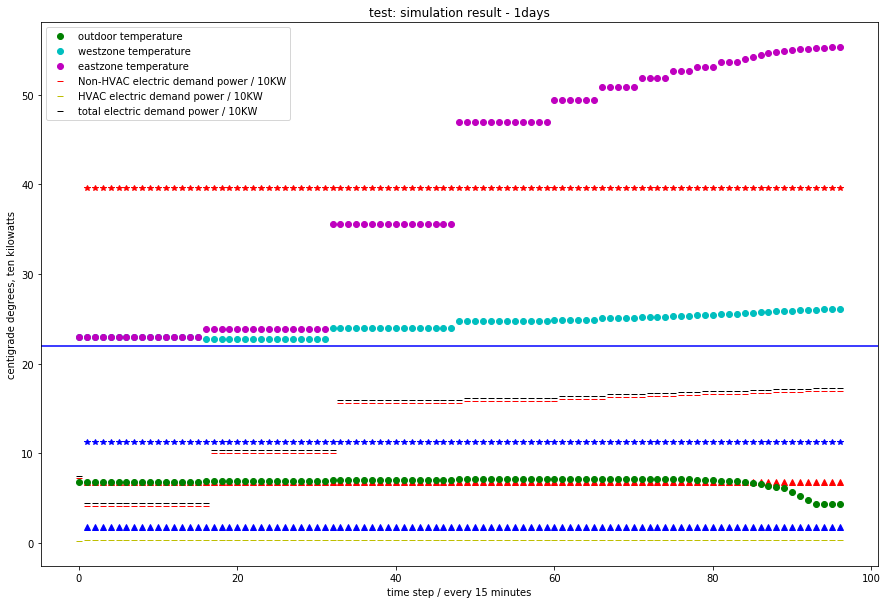

In [32]:
import torch
mlp = torch.load('/home/xiaonanchong/policy-gradient/TRAINED_MODEL')

import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env_id = 'gym_energyplus:EnergyPlus-v0'
env = gym.make(env_id)

plt.rcParams['figure.figsize'] = [15, 10]
plt.title('test: simulation result - 1days')
plt.xlabel('time step / every 15 minutes')
plt.ylabel('centigrade degrees, ten kilowatts')

plt.axhline(y=22, color='b', linestyle='-') # print target temperature

observation = env.reset()

plt.plot(0, observation[0], 'go', label='outdoor temperature')
plt.plot(0, observation[1], 'co', label='westzone temperature')
plt.plot(0, observation[2], 'mo', label='eastzone temperature')
plt.plot(0, observation[4]/r, 'r_', label='Non-HVAC electric demand power / 10KW')
plt.plot(0, observation[5]/r, 'y_', label='HVAC electric demand power / 10KW')
plt.plot(0, observation[3]/r, 'k_', label='total electric demand power / 10KW')

for i in range(96):
    #################################################
    ob = np.array(observation,dtype=np.float32)
    #print('observation:', ob)
    x = torch.from_numpy(ob).view(-1,6)
    y = mlp(x)
    print('action:', y)
    [action] = y.cpu().detach().numpy()    
    #################################################
    observation, reward, done, info = env.step(action)
    
    plt.plot(i+1, action[0]*15+25, 'b*')
    plt.plot(i+1, action[1]*15+25, 'r*')
    plt.plot(i+1, action[2]*5.25/2+5.25/2+1.75, 'b^')
    plt.plot(i+1, action[3]*5.25/2+5.25/2+1.75, 'r^')
      
    plt.plot(i+1, observation[0], 'go')
    plt.plot(i+1, observation[1], 'co')
    plt.plot(i+1, observation[2], 'mo')
    plt.plot(i+1, observation[4]/r, 'r_')
    plt.plot(i+1, observation[5]/r, 'y_')
    plt.plot(i+1, observation[3]/r, 'k_')
    
plt.legend()